In [1]:
#importing useful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#this data was gotten from kaggle from this link below
#https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-comic-characters-dataset
#loading the marvel data 
df = pd.read_csv('marvel_data.csv')
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [3]:
#splting the name colomn into secret identity and superhero name
def extrctr1(wrd):
    for i in range(len(wrd)):
        if (wrd[i] == '('):
            return wrd[:i]
#I am sorry i should have used regular expressions but i will always try to escape it when i can 
#Some times you can not escape it 
#this is not one of those times
def extrctr2(wrd):
    for i in range(len(wrd)):
        if (wrd[i] == '('):
            return wrd[i+1:-1]
        
df['secret_identity'] = df['name'].apply(extrctr2)
df['hero_name'] = df['name'].apply(extrctr1)

In [4]:
df.tail()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,secret_identity,hero_name
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN,Earth-616,Ru'ach
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN,Thanos' son) (Earth-616,Thane
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN,Skrull) (Earth-616,Tinkerer
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN,Spiderling) (Earth-616,TK421
16375,673702,Yologarch (Earth-616),\/Yologarch_(Earth-616),NaN,Bad Characters,NaN,NaN,NaN,NaN,Living Characters,NaN,NaN,NaN,Earth-616,Yologarch


In [5]:
#now we can getrid of that name column
df.drop('name', inplace = True, axis = 1)
#lets take a look at the data types of the columns 
#focusing on the date column lets join them together 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   urlslug           16376 non-null  object 
 2   ID                12606 non-null  object 
 3   ALIGN             13564 non-null  object 
 4   EYE               6609 non-null   object 
 5   HAIR              12112 non-null  object 
 6   SEX               15522 non-null  object 
 7   GSM               90 non-null     object 
 8   ALIVE             16373 non-null  object 
 9   APPEARANCES       15280 non-null  float64
 10  FIRST APPEARANCE  15561 non-null  object 
 11  Year              15561 non-null  float64
 12  secret_identity   16344 non-null  object 
 13  hero_name         16344 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 1.7+ MB


In [6]:
#the date columns have quite unusual formats so i would tweak that

def extrctr3(wrd):
    for i in range(len(wrd)):
        if (wrd[i] == '-'):
            return wrd[:i]

df['FIRST APPEARANCE'] = df['FIRST APPEARANCE'].astype(str).apply(extrctr3)
df['FIRST APPEARANCE'].head()

0    Aug
1    Mar
2    Oct
3    Mar
4    Nov
Name: FIRST APPEARANCE, dtype: object

In [7]:
df['FIRST APPEARANCE'].unique()

array(['Aug', 'Mar', 'Oct', 'Nov', 'May', 'Sep', None, 'Apr', 'Jul',
       'Jun', 'Jan', 'Feb', 'Dec'], dtype=object)

In [8]:
#now we can add it to the year column
df['FIRST APPEARANCE'] = df['FIRST APPEARANCE'] + '-' + df['Year'].astype(str)
df.drop('Year', inplace = True, axis = 1)
df.head()

,page_id,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,secret_identity,hero_name
0,1678,\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-1962.0,Peter Parker,Spider-Man
1,7139,\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-1941.0,Steven Rogers,Captain America
2,64786,\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-1974.0,"James \""Logan\"" Howlett",Wolverine
3,1868,\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-1963.0,"Anthony \""Tony\"" Stark",Iron Man
4,2460,\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-1950.0,Thor Odinson,Thor


In [9]:
#still looks wierd right 
# lets just pick all the lettetrs apart from the last two characters '.0'
def extrctr4(stff):
    return stff[:-2]
df['FIRST APPEARANCE'] = df['FIRST APPEARANCE'].astype(str).apply(extrctr4)
df.head()

,page_id,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,secret_identity,hero_name
0,1678,\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-1962,Peter Parker,Spider-Man
1,7139,\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-1941,Steven Rogers,Captain America
2,64786,\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-1974,"James \""Logan\"" Howlett",Wolverine
3,1868,\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-1963,"Anthony \""Tony\"" Stark",Iron Man
4,2460,\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-1950,Thor Odinson,Thor


In [10]:
# ok good 
# from the meta data the GSM column is for wether the character is a sexual minority 
# so for all the Nan we will change it to 'straight'
#lets check the unique values first
df['GSM'].unique()

array([nan, 'Bisexual Characters', 'Transvestites',
       'Homosexual Characters', 'Pansexual Characters',
       'Transgender Characters', 'Genderfluid Characters'], dtype=object)

In [11]:
df[df['GSM'] == 'Transgender Characters']
# if you were wondering 

,page_id,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,secret_identity,hero_name
581,392311,\/Tong_(Moloid)_(Earth-616),Secret Identity,Good Characters,NaN,No Hair,Female Characters,Transgender Characters,Living Characters,67.0,Mar-2010,Moloid) (Earth-616,Tong
9554,280680,\/Jessie_Drake_(Earth-616),NaN,NaN,Brown Eyes,Blond Hair,Female Characters,Transgender Characters,Living Characters,2.0,Mar-1994,Earth-616,Jessie Drake


In [12]:
df[df['GSM'] == 'Pansexual Characters']
#here you go again

,page_id,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,secret_identity,hero_name
275,2023,\/Julie_Power_(Earth-616),Secret Identity,Good Characters,Blue Eyes,Strawberry Blond Hair,Female Characters,Pansexual Characters,Living Characters,150.0,Aug-1984,Earth-616,Julie Power


In [13]:
#lets move on 
df['GSM'] = df['GSM'].fillna('Straight')
df.head()

,page_id,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,secret_identity,hero_name
0,1678,\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Straight,Living Characters,4043.0,Aug-1962,Peter Parker,Spider-Man
1,7139,\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Straight,Living Characters,3360.0,Mar-1941,Steven Rogers,Captain America
2,64786,\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Straight,Living Characters,3061.0,Oct-1974,"James \""Logan\"" Howlett",Wolverine
3,1868,\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight,Living Characters,2961.0,Mar-1963,"Anthony \""Tony\"" Stark",Iron Man
4,2460,\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Straight,Living Characters,2258.0,Nov-1950,Thor Odinson,Thor


In [14]:
#Now the ALIVE column should be a boolean right?
#lets see if there are any undead characters so we will know
df['ALIVE'].unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [15]:
#lets check the null 
df[df['ALIVE'].isnull()]

,page_id,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,secret_identity,hero_name
16293,541449,\/User:Mj7711,NaN,NaN,NaN,NaN,NaN,Straight,NaN,NaN,n,None,None
16329,714409,\/User:Sharjeel786,NaN,NaN,NaN,NaN,NaN,Straight,NaN,NaN,n,None,None
16347,462671,\/User:TOR\/test,NaN,NaN,NaN,NaN,NaN,Straight,NaN,NaN,n,None,None


In [16]:
#lets drop these rows
rmv_indx = df[df['ALIVE'].isnull()].index  
df.drop(inplace = True, index = rmv_indx)
df[df['ALIVE'].isnull()]

,page_id,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,secret_identity,hero_name


In [17]:
#all done
# so lets get back to the ALIVE column
def to_boolean(stf):
    if stf == 'Living Characters':
        return True
    else:
        return False

df['ALIVE'] = df['ALIVE'].apply(to_boolean)
df.head()

,page_id,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,secret_identity,hero_name
0,1678,\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Straight,True,4043.0,Aug-1962,Peter Parker,Spider-Man
1,7139,\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Straight,True,3360.0,Mar-1941,Steven Rogers,Captain America
2,64786,\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Straight,True,3061.0,Oct-1974,"James \""Logan\"" Howlett",Wolverine
3,1868,\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight,True,2961.0,Mar-1963,"Anthony \""Tony\"" Stark",Iron Man
4,2460,\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Straight,True,2258.0,Nov-1950,Thor Odinson,Thor


In [18]:
df.SEX.unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters', nan], dtype=object)

C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


Text(0.5, 1.0, 'DIstribution of sex of characters in relation to there appearances')

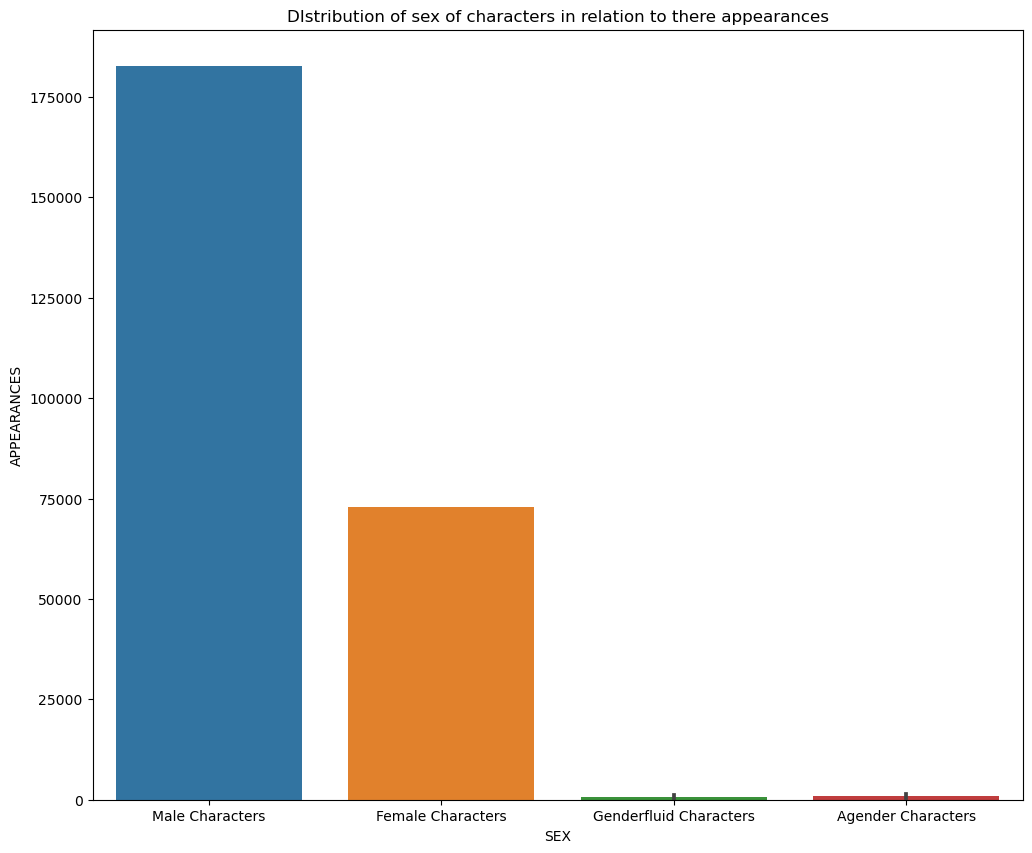

In [19]:
#Now we are done with cleaning 
#let's make some visualizations shall we
#lets look at the distribution of male and female characters in relation to there number of appearances
plt.figure(figsize = (12,10))
sns.barplot(x = 'SEX' , y = 'APPEARANCES' , data = df, estimator = np.sum)
plt.title('DIstribution of sex of characters in relation to there appearances')
#plt.savefig('barplt_sex.png')


In [20]:
df.groupby('SEX').APPEARANCES.sum()
#just checking

SEX
Agender Characters           826.0
Female Characters          73005.0
Genderfluid Characters       565.0
Male Characters           182601.0
Name: APPEARANCES, dtype: float64

C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Straight'),
  Text(1, 0, 'Bisexual Characters'),
  Text(2, 0, 'Transvestites'),
  Text(3, 0, 'Homosexual Characters'),
  Text(4, 0, 'Pansexual Characters'),
  Text(5, 0, 'Transgender Characters'),
  Text(6, 0, 'Genderfluid Characters')])

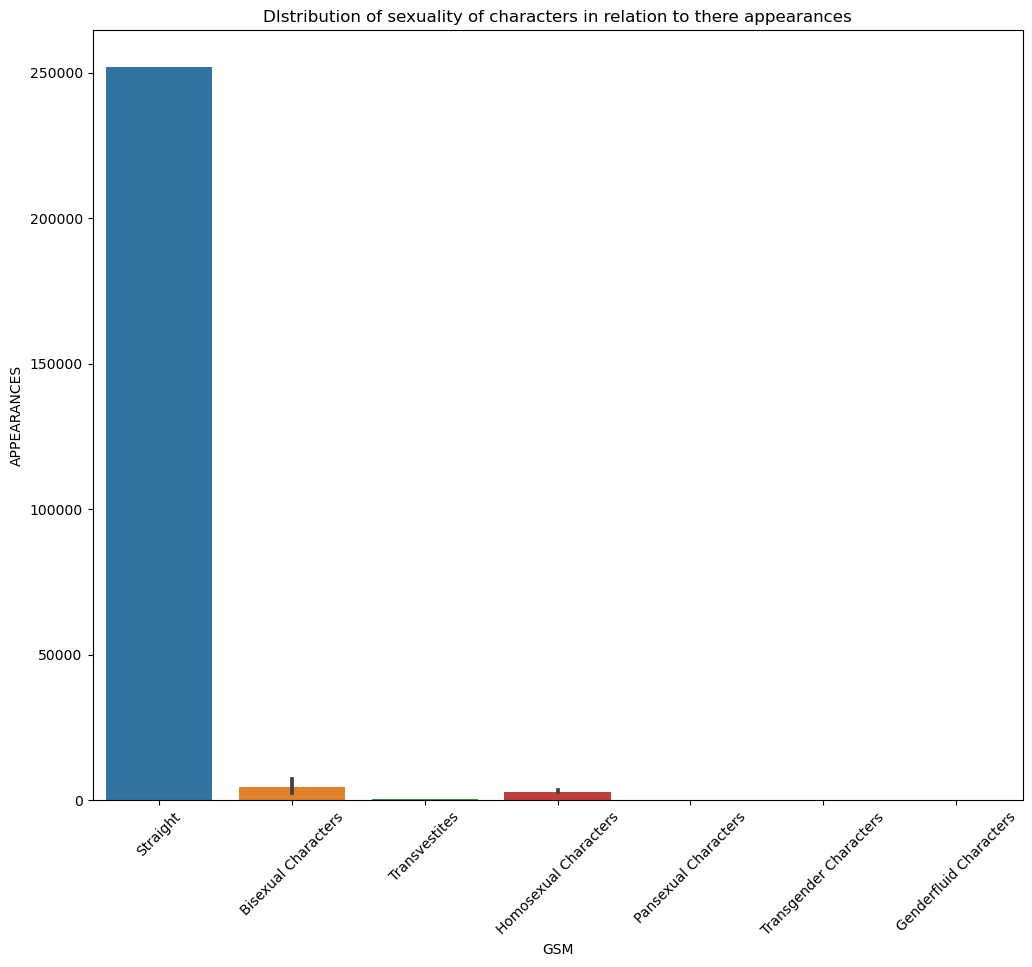

In [21]:
#lets do the same but according to their sexuality
plt.figure(figsize = (12,10))
sns.barplot(x = 'GSM' , y = 'APPEARANCES' , data = df, estimator = np.sum)
plt.title('DIstribution of sexuality of characters in relation to there appearances')
plt.xticks(rotation = 45)
#plt.savefig('barplt_sexuality.png')


In [22]:
df.groupby('GSM').APPEARANCES.sum()

GSM
Bisexual Characters         4616.0
Genderfluid Characters        33.0
Homosexual Characters       2845.0
Pansexual Characters         150.0
Straight                  252057.0
Transgender Characters        69.0
Transvestites                500.0
Name: APPEARANCES, dtype: float64

In [23]:
#so lets create a new column 'Years spent' 
#i.e from there first appearance till now
def extrctr6(stff):
    if len(stff[4:]) == 4:
        return int(stff[4:])


df['Years_spent'] = 2023 - df['FIRST APPEARANCE'].apply(extrctr6)

df['Years_spent'].head()


0    61.0
1    82.0
2    49.0
3    60.0
4    73.0
Name: Years_spent, dtype: float64

In [24]:
df.head()

,page_id,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,secret_identity,hero_name,Years_spent
0,1678,\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Straight,True,4043.0,Aug-1962,Peter Parker,Spider-Man,61.0
1,7139,\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Straight,True,3360.0,Mar-1941,Steven Rogers,Captain America,82.0
2,64786,\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Straight,True,3061.0,Oct-1974,"James \""Logan\"" Howlett",Wolverine,49.0
3,1868,\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight,True,2961.0,Mar-1963,"Anthony \""Tony\"" Stark",Iron Man,60.0
4,2460,\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Straight,True,2258.0,Nov-1950,Thor Odinson,Thor,73.0


C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


Text(0.5, 1.0, 'Life and years spent')

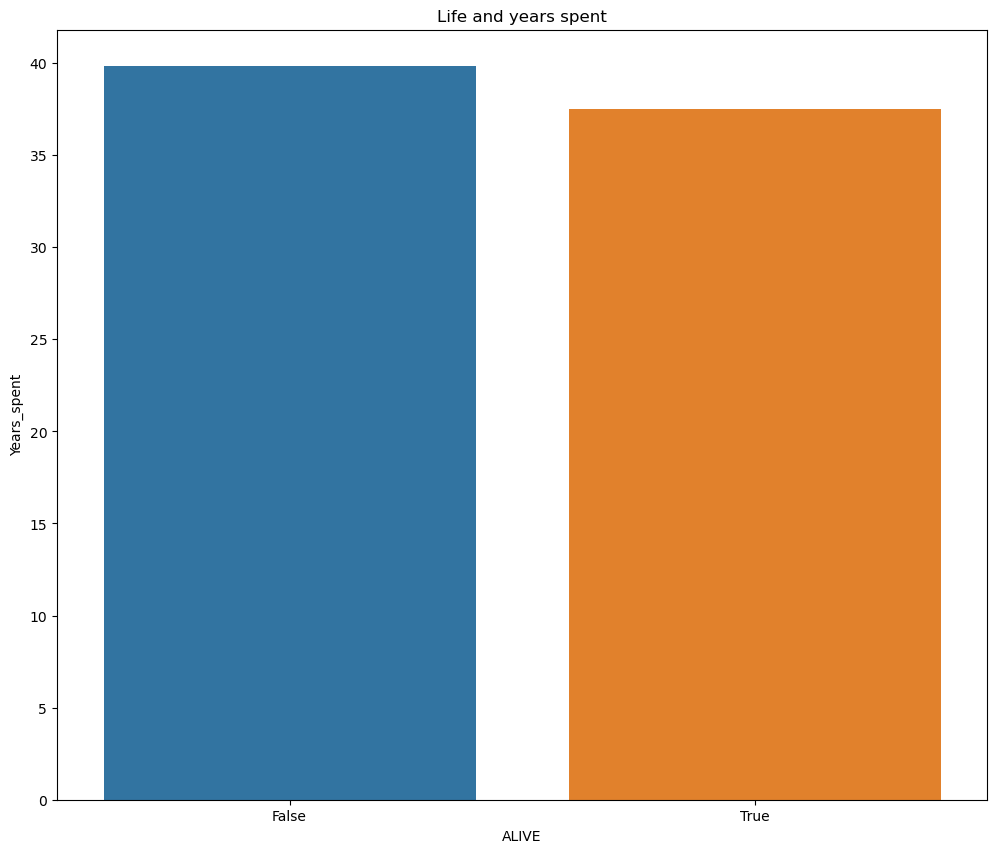

In [53]:
plt.figure(figsize = (12,10))
sns.barplot(x = 'ALIVE' , y = 'Years_spent' , data = df, estimator = np.mean)
plt.title('Life and years spent')
#plt.xticks(rotation = 45)
#plt.savefig('barplt_sexuality.png')

In [26]:
#so dead characters on average have spent more years than alive characters 
#That makes sense

C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


Text(0.5, 1.0, 'appearances according to Life')

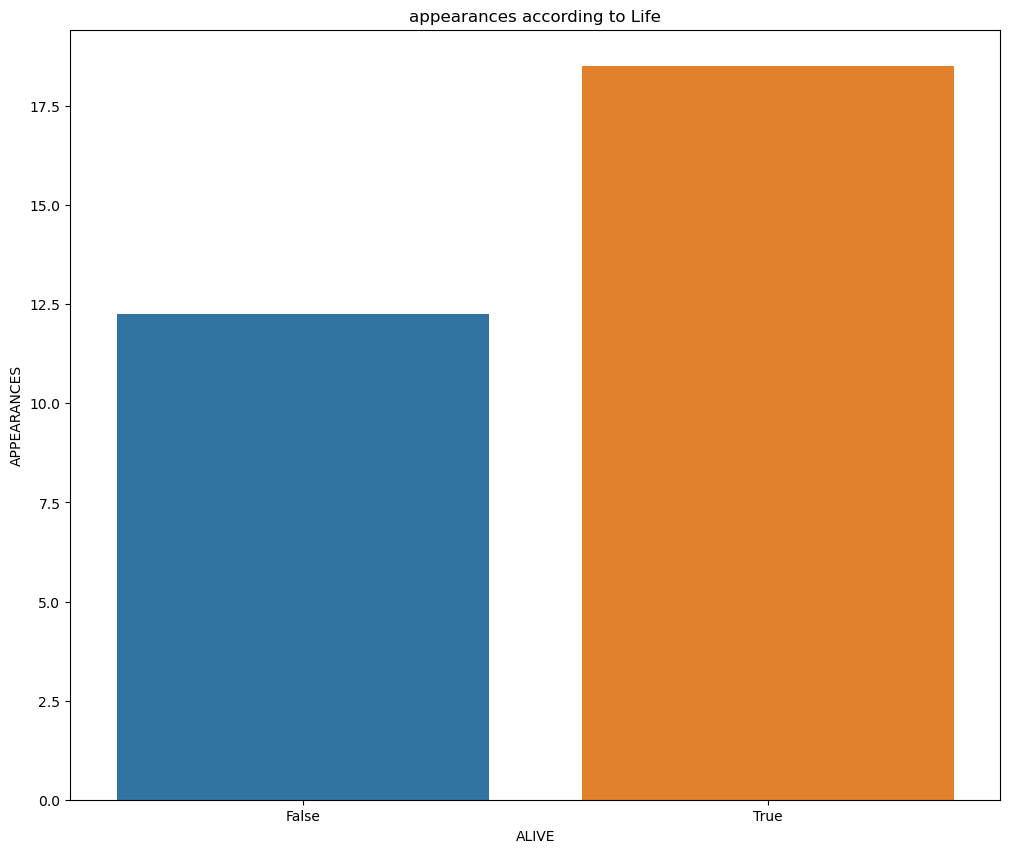

In [52]:
plt.figure(figsize = (12,10))
sns.barplot(x = 'ALIVE' , y = 'APPEARANCES' , data = df, estimator = np.mean)
plt.title('appearances according to Life')
#plt.xticks(rotation = 45)
#plt.savefig('barplt_sexuality.png')

In [28]:
#But they have less appearances on average

In [47]:
#lets see the character with the most appearances and the most years spent
print('MOST APPEARANCES :' +  df[df['APPEARANCES'] == df['APPEARANCES'].max()]['hero_name'].iloc[0]  + "\nIdentity :"  + 
     df[df['APPEARANCES'] == df['APPEARANCES'].max()]['secret_identity'].iloc[0])
print('MOST YEARS SPENT :' +  df[df['Years_spent'] == df['Years_spent'].max()]['hero_name'].iloc[0]  + "\nIdentity :"  + 
     df[df['Years_spent'] == df['Years_spent'].max()]['secret_identity'].iloc[0])

MOST APPEARANCES :Spider-Man 
Identity :Peter Parker
MOST YEARS SPENT :Human Torch 
Identity :Android) (Earth-616


C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarnin

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Brown Hair'),
  Text(1, 0, 'White Hair'),
  Text(2, 0, 'Black Hair'),
  Text(3, 0, 'Blond Hair'),
  Text(4, 0, 'No Hair'),
  Text(5, 0, 'Blue Hair'),
  Text(6, 0, 'Red Hair'),
  Text(7, 0, 'Bald'),
  Text(8, 0, 'Auburn Hair'),
  Text(9, 0, 'Grey Hair'),
  Text(10, 0, 'Silver Hair'),
  Text(11, 0, 'Purple Hair'),
  Text(12, 0, 'Strawberry Blond Hair'),
  Text(13, 0, 'Green Hair'),
  Text(14, 0, 'Reddish Blond Hair'),
  Text(15, 0, 'Gold Hair'),
  Text(16, 0, 'Orange Hair'),
  Text(17, 0, 'Pink Hair'),
  Text(18, 0, 'Variable Hair'),
  Text(19, 0, 'Yellow Hair'),
  Text(20, 0, 'Light Brown Hair'),
  Text(21, 0, 'Magenta Hair'),
  Text(22, 0, 'Bronze Hair'),
  Text(23, 0, 'Dyed Hair'),
  Text(24, 0, 'Orange-brown Hair')])

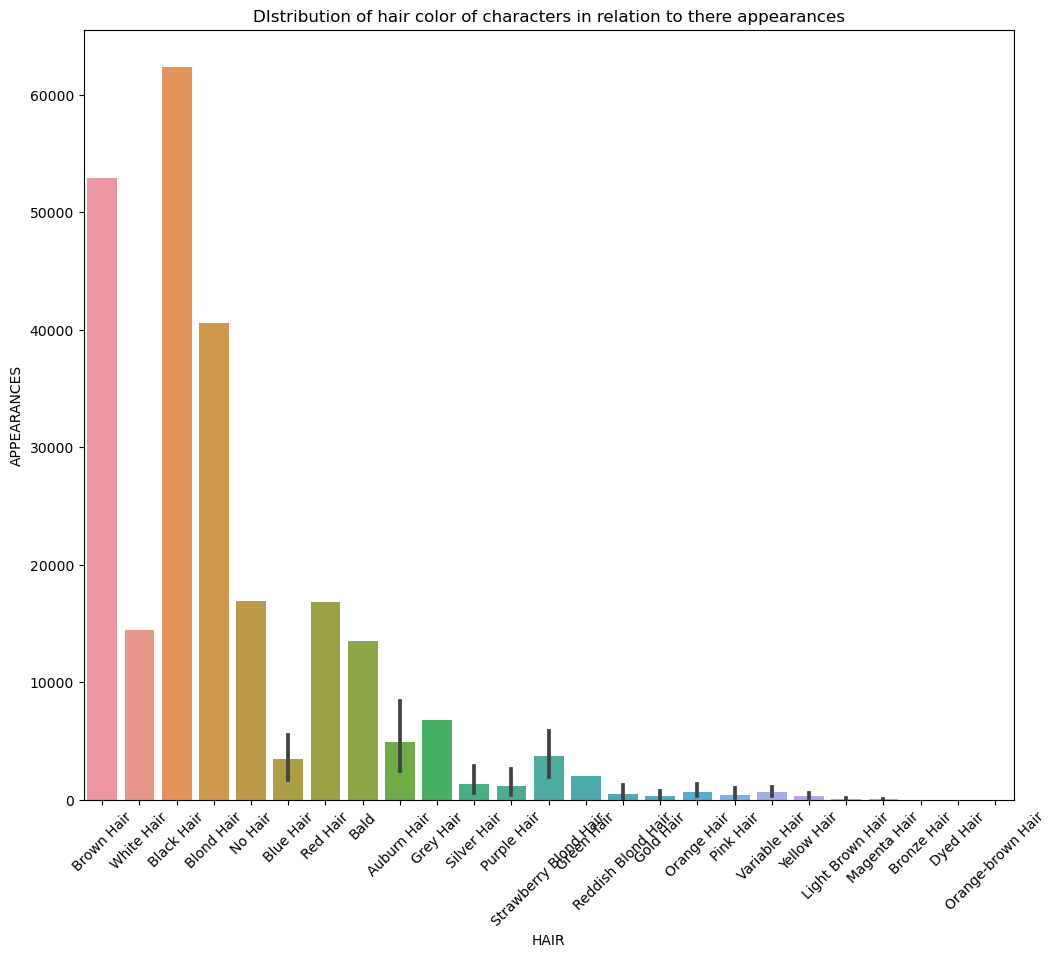

In [49]:
#Just cuz i feel like 
#i am going to check appearances with hair color and eye color
# i wanna check something 
# even if race was not included i can still find a trend in regards to that 
plt.figure(figsize = (12,10))
sns.barplot(x = 'HAIR' , y = 'APPEARANCES' , data = df, estimator = np.sum)
plt.title('DIstribution of hair color of characters in relation to there appearances')
plt.xticks(rotation = 45)
#plt.savefig('barplt_sexuality.png')


C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarnin

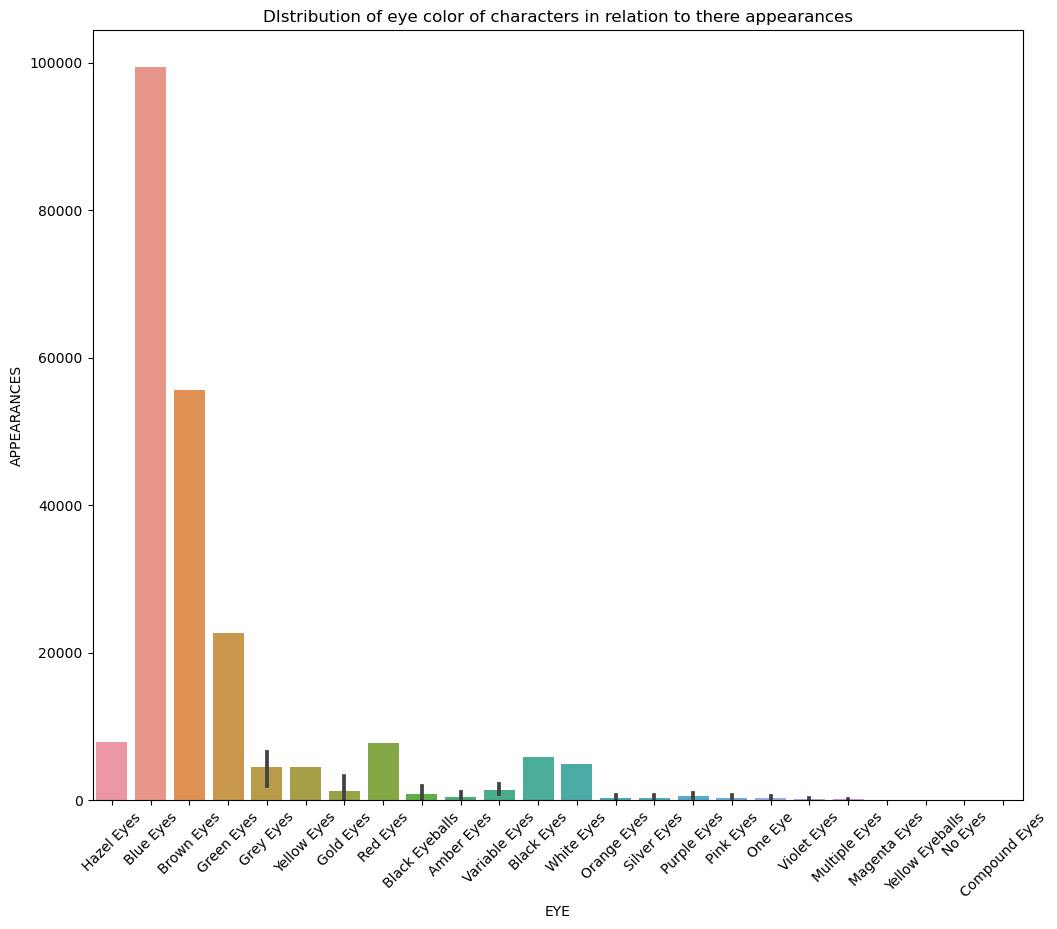

In [51]:
plt.figure(figsize = (12,10))
sns.barplot(x = 'EYE' , y = 'APPEARANCES' , data = df, estimator = np.sum)
plt.title('DIstribution of eye color of characters in relation to there appearances')
plt.xticks(rotation = 45);
#plt.savefig('barplt_sexuality.png')

In [ ]:
#That will be all 
#Until next time 